In [1]:
from python_bitvavo_api.bitvavo import Bitvavo
import json
import time
import datetime
import numpy as np
import mplfinance as mpf
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
bitvavo = Bitvavo({
    'APIKEY': ' ',
    'APISECRET': ' ',
    'RESTURL': 'https://api.bitvavo.com/v2',
    'WSURL': 'wss://ws.bitvavo.com/v2/',
    'ACCESSWINDOW': 10000,
    'DEBUGGING': False
  })

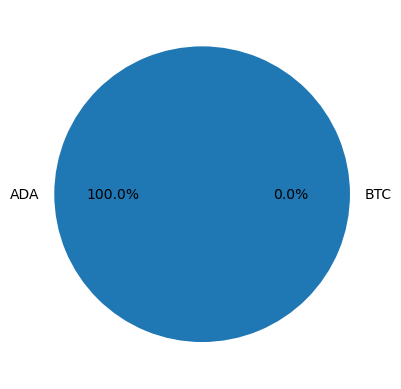

In [3]:
response = bitvavo.balance({})
symbols = []
values = []
for item in response:
    if item["available"] != "0":
        symbols.append(item["symbol"])
        values.append(item["available"])

plt.pie(values, labels=symbols, autopct='%1.1f%%')
plt.show()        

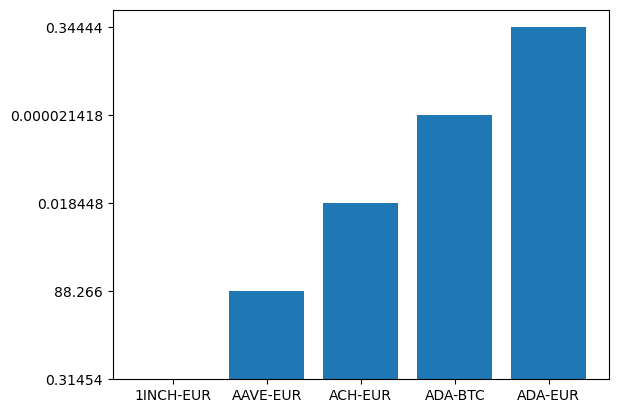

In [4]:
response = bitvavo.ticker24h({})

markets = []
prices = []
for item in response:
    # Convert market names to strings explicitly
    markets.append(str(item["market"]))
    prices.append(item["bid"] if item["bid"] is not None else "0.0")

# Optional: Limit the number of bars for readability
max_bars = 5
if len(markets) > max_bars:
    markets = markets[:max_bars]
    prices = prices[:max_bars]

plt.bar(markets, prices)
plt.show()

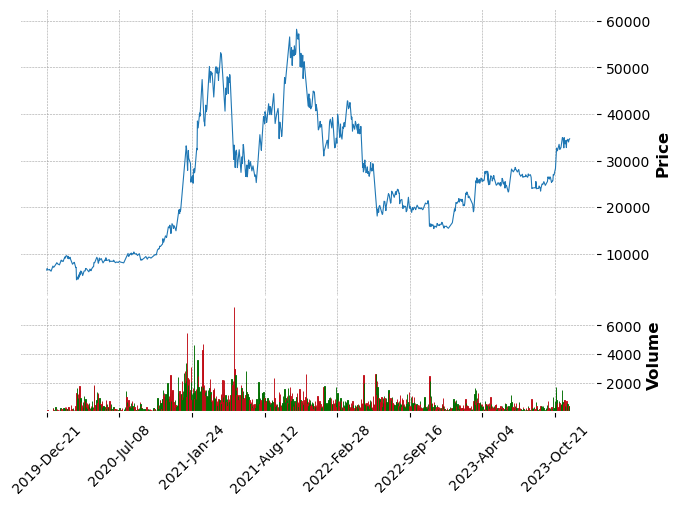

In [5]:
# Timestamp: candle[0], open: candle[1], high: candle[2], low: candle[3], close: candle[4], volume: candle[5]
response = bitvavo.candles('BTC-EUR', '1d', {})

# DataFrame
data = {
    'Date' : [],
    'Open' : [],
    'High' : [],
    'Low' : [],
    'Close' : [],
    'Volume' : []
}

for candle in response:
    timestamp_seconds = candle[0] / 1000
    dt = datetime.datetime.fromtimestamp(timestamp_seconds)
    
    data['Date'].append(dt)
    data['Open'].append(float(candle[1]))
    data['High'].append(float(candle[2]))
    data['Low'].append(float(candle[3]))
    data['Close'].append(float(candle[4]))
    data['Volume'].append(float(candle[5]))

# Create DataFrame
df = pd.DataFrame(data)
df.set_index('Date', inplace=True)

# Sort the DataFrame by date in ascending order
df.sort_index(inplace=True)

# Plot
mpf.plot(df, type='line', style='charles', volume=True)